In [327]:
# imports
import pandas as pd
import numpy as np

In [328]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [329]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [330]:
# pre-processing
def get_dias_fechados():
    return ['2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA']).dt.strftime("%Y%m%d")))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='IS_FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados()).astype(int)))
df.insert(loc=3, column='IS_FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=4, column='IS_FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=5, column='IS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=6, column='IS_VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=7, column='IS_POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=8, column='IS_SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento()).astype(int)))
df.insert(loc=9, column='IS_BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas()).astype(int)))
df.insert(loc=10, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=11, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=12, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=13, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('IS_FECHADO == 0')
df = df.drop(columns=['IS_FECHADO'])

In [340]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS'])
y = df.drop(columns=['DATA', 'IS_FDS', 'IS_FERIADO', 'IS_DATA_FESTIVA', 'IS_VESPERA_DATA_FESTIVA', 'IS_POS_DATA_FESTIVA', 'IS_SEMANA_PAGAMENTO', 'IS_BAIXA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# standardization & normalization
X = preprocessing.scale(X)

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

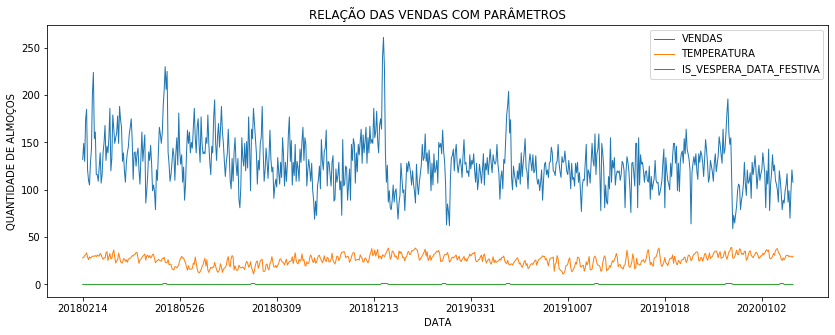

In [341]:
import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt

# plot chart
mpld3.enable_notebook()
df.plot(y=['VENDAS', 'TEMPERATURA', 'IS_VESPERA_DATA_FESTIVA'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=1)
plt.title('RELAÇÃO DAS VENDAS COM PARÂMETROS')
plt.xlabel('DATA')
plt.ylabel('QUANTIDADE DE ALMOÇOS')
plt.show()

In [333]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1) 
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Acurácia do LinearRegression: {round(accuracy*100, 2)}%')

Acurácia do LinearRegression: 23.62%


In [334]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures

# model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression(fit_intercept = False))
# model.fit(X_train, y_train)
# accuracy = model.score(X_test, y_test)
# print(f'Acurácia do PolynomialFeatures: {round(accuracy*100, 2)}%')

In [335]:
# model = MLPClassifier(hidden_layer_sizes=(100,100,100), alpha=0.0001, solver='sgd', verbose=10,  random_state=21, tol=0.000000001)
# model.fit(X_train, y_train)
# accuracy = model.score(X_test, y_test)
# print(f'Acurácia do MLPClassifier: {round(accuracy*100, 2)}%')

In [336]:
df

,DATA,VENDAS,IS_FDS,IS_FERIADO,IS_DATA_FESTIVA,IS_VESPERA_DATA_FESTIVA,IS_POS_DATA_FESTIVA,IS_SEMANA_PAGAMENTO,IS_BAIXA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
0,20180214,132,0,0,0,0,0,0,1,7,0.0,28.0,66.75
1,20180215,149,0,0,0,0,0,0,1,7,0.0,28.6,61.50
2,20180216,130,0,0,0,0,0,0,1,7,0.0,30.6,65.25
3,20180217,174,1,0,0,0,0,0,1,7,0.0,31.5,65.75
4,20180218,185,1,0,0,0,0,0,1,7,0.0,33.4,58.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,20200203,99,0,0,0,0,0,0,0,13,0.0,29.2,66.00
748,20200303,70,0,0,0,0,0,0,0,13,0.0,30.0,70.00
749,20200403,98,0,0,0,0,0,0,0,13,0.0,29.7,67.00
750,20200503,121,0,0,0,0,0,1,0,13,0.0,28.8,67.00


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 751
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA                     733 non-null    object 
 1   VENDAS                   733 non-null    int64  
 2   IS_FDS                   733 non-null    int64  
 3   IS_FERIADO               733 non-null    int64  
 4   IS_DATA_FESTIVA          733 non-null    int64  
 5   IS_VESPERA_DATA_FESTIVA  733 non-null    int64  
 6   IS_POS_DATA_FESTIVA      733 non-null    int64  
 7   IS_SEMANA_PAGAMENTO      733 non-null    int64  
 8   IS_BAIXA_TEMPORADA       733 non-null    int64  
 9   QTD_CONCORRENTES         733 non-null    int64  
 10  PRECIPITACAO             733 non-null    float64
 11  TEMPERATURA              733 non-null    float64
 12  UMIDADE                  733 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 80.2+ KB


In [338]:
########################################## PERGUNTAS
# Está boa a separação de dados 70:30 ?
# Uma vez que conheco minha label (y), está certo eu excluir os ...Classifiers?
# Por que a cada vez que rodo, o shuffle dos dados faz o score mudar tanto?
# Por que a adição da coluna DATA, faz mudar tanto?
# Como saber se meu score nao está sendo binário? É OK usar para saber a acurácia do modelo ?
# Devo separar o meu dataframe por tipo de dado (binário, quantitativo, sequencial...) ?
# Preciso especificar os pesos do meus parametros de acordo com a importancia ? E como fazer?
# Preciso normalizar os as features que são do tipo binario (x)? E qual o melhor jeito já que int > bool (vendas > is_fds) ?
# Baseado no tipo de dado que possuo, o que voces sugerem?

########################################## HIPOTESES DE ALGORITMOS
# Lineares: PolynomialRegression / LinearRegression
# Serie Temporal: SARIMA / PROPHET
# AI: MLPRegressor / RecurrentNN
# Ensemble: GradientBoosting

########################################## RACIONAL DAS HIPOTESES
# PolynomialRegression: (dg=5) aceita mais "outliers" / variações
# LinearRegression: Mais simples e teve melhor resultado até entao (nao concordo)
# SARIMA: Por poder considerar também a sazonalidade
# MLPRegressor: Mais simples / comum e se encaixa no que desejo
# RecurrentNN: Output previsto em um determinado momento, se torna o input p/ fazer correção considerando os novos (Long Short Term Memory)

########################################## MODELS
# Comparisons
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
# https://www.kaggle.com/ankitjha/comparing-regression-models

# Supervised learning
# https://scikit-learn.org/stable/supervised_learning.html
# Quando eu sei a minha label (y)
# Regressor: Quando é realmente o numero real que eu quero prever
# Classifier: Quando é um indicativo do numero real que eu quero prever

# Neural network models Supervised
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised
# FeedForward: O processo de passar os valores através dos pessoas do input, hiddenlayers aos outputs
# BackPropagation: O preocesso de calcular o error do valor que adivinhei e voltar para as camadas anteriores para saber o peso e fazer os ajustes para melhoria
# Bias: Equalizador

# Linear Models
# https://scikit-learn.org/stable/modules/linear_model.html
# o valor desejado espera-se que seja uma combinação linear entre as features (x)

# Neighbors
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

# Ensemble
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [339]:
# # imports
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# import plotly.offline as py
# import seaborn as sns

# # configs
# py.init_notebook_mode()

# # feature enginerring
# train_df = df.rename(columns={'DATA': 'ds', 'VENDAS': 'y'})

# # model training
# model = Prophet(daily_seasonality=True)
# model.fit(train_df)

# # future prediction
# future = model.make_future_dataframe(periods=30)
# forecast = model.predict(future)

# # plot
# f, ax = plt.subplots(1)
# f.set_figheight(5)
# f.set_figwidth(15)
# fig = model.plot(forecast, ax=ax)
# plt.show()

# model.fit(pjme_train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'}))